In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
capital = 60000
years = 30
n = years*12
ir = 0.023
mir = ir/12

### French style 

In [3]:
M = {'FR':{},'IT':{}}
k = 'FR'

In [4]:
r = capital*mir/(1- (1/(1+mir)**n))
M[k]['R'] = np.ones(n)*r
M[k]['C'],M[k]['P'],M[k]['I'] = [],[],[]
left = capital
for i in range(n):    
    interest = left*mir
    payment  = r - interest
    left = left - payment
    
    M[k]['P'].append(payment)
    M[k]['I'].append(interest)
    M[k]['C'].append(left)
    
M[k]['P'] = np.array(M[k]['P'])
M[k]['I'] = np.array(M[k]['I'])
M[k]['C'] = np.array(M[k]['C'])

### Italian Style

In [5]:
k = 'IT'

In [6]:
p = capital / n
M[k]['P'] = np.ones(n)*p
M[k]['C'],M[k]['R'],M[k]['I'] = [],[],[]
left = capital
for i in range(n):    
    interest = left*mir
    left = left - p
    
    M[k]['R'].append(p + interest)
    M[k]['I'].append(interest)
    M[k]['C'].append(left)
    
M[k]['R'] = np.array(M[k]['R'])
M[k]['I'] = np.array(M[k]['I'])
M[k]['C'] = np.array(M[k]['C'])

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [102]:
M = (int((df['I_IT']+df['P_IT'])[0]/100)+1)*100
M

300

In [103]:
fig = px.area(df, x="Month", y="P_FR",color_discrete_sequence=['blue'],
              labels={"P_FR": "Total monthly payment", "Month": "# Month"}, title='Annuity Mortgage')
fig2 = px.area(df, x="Month", y="I_FR",color_discrete_sequence=['orange']) 
fig.add_trace(fig2.data[0])
fig['data'][0]['showlegend']=True
fig['data'][0]['name']='Repayments'
fig['data'][1]['showlegend']=True
fig['data'][1]['name']='Interest costs'
fig.update_layout(yaxis_range=[0,M])

fig.show()

In [34]:
?px.area

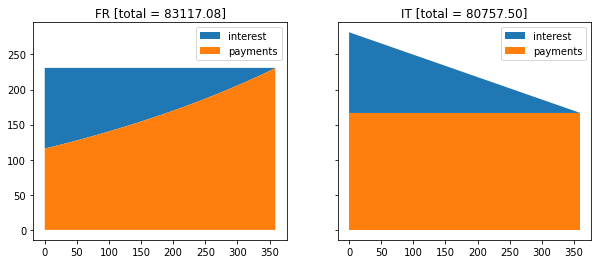

In [40]:
fig,ax = plt.subplots(ncols=2,figsize=(10,4),sharey=True)

for ik,k in enumerate(['FR','IT']):
    ax[ik].fill_between(np.arange(n),M[k]['P'],M[k]['P']+M[k]['I'],label = 'interest')
    ax[ik].fill_between(np.arange(n),M[k]['P'],label = 'payments')
    ax[ik].legend()
    total_cost = np.sum(M[k]['R'])
    ax[ik].set_title(f'{k} [total = {total_cost:.2f}]')

In [41]:
df = pd.DataFrame(M['FR']).merge(pd.DataFrame(M['IT']),left_index=True,right_index=True,suffixes=('_FR','_IT'))

In [42]:
df['Month'] = np.arange(len(df)) + 1

Text(159, 233.18958209028307, '159 months (13.25 years)')

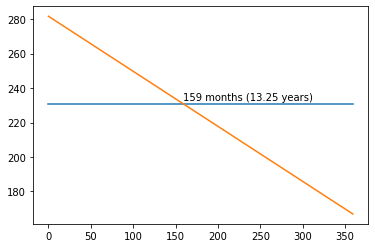

In [43]:
plt.plot(M['FR']['R'])
plt.plot(M['IT']['R'])
switch = np.where(M['IT']['R'] < M['FR']['R'])[0][0]
plt.annotate(f'{switch} months ({switch/12} years)',(switch,1.01*r))